# seqNMF Demo

This notebook demonstrates the seqNMF to both synthetic data and songbird data (provided by Emily Mackevicius).

## Setup

In [85]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.io
from seqnmf import seq_nmf
from seqnmf import _reconstruct
from tests import seq_nmf_data
%matplotlib inline

## Generate synthetic data

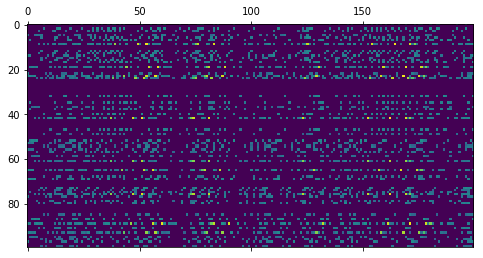

In [68]:
N = 100  # Number of neurons
T = 200  # Length of data in time
L = 10  # Max time lag
K = 2  # Number of factors
sparsity=0.75

data, Wreal, Hreal = seq_nmf_data(N, T, L, K, sparsity)

plt.matshow(data)
plt.show()

## Fit synthetic data

Let's try fitting a simple, single sequence model.

In [69]:
Hreal /= la.norm(Hreal, axis=-1, keepdims=True)  # normalize

lam = 10**(-6)
W, H, costhist, loadings, power = seq_nmf(data, K=K, L=2*L, lam=lam, maxiter=100)

Reconstruction Error:  0.0375411854821


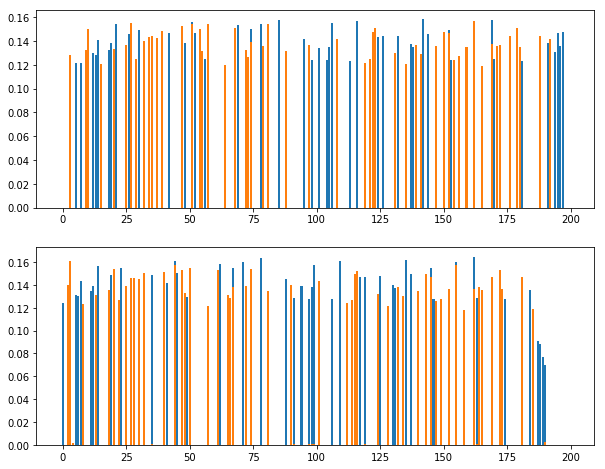

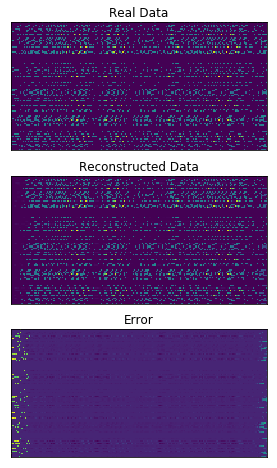

In [106]:
error = data - _reconstruct(W,H)
print('Reconstruction Error: ', la.norm(error)**2 / la.norm(data)**2)

fig, axes = plt.subplots(2, 1, figsize=(10,8))
axes[0].bar(range(T), Hreal[0])
axes[0].bar(range(T), Hreal[1])
axes[1].bar(range(T), H[0])
axes[1].bar(range(T), H[1])
plt.show()

fig, axes = plt.subplots(3, 1, figsize=(10,8))
axes[0].imshow(data)
axes[0].set_title('Real Data')
axes[0].get_xaxis().set_ticks([])
axes[0].get_yaxis().set_ticks([])

axes[1].imshow(_reconstruct(W,H))
axes[1].set_title('Reconstructed Data')
axes[1].get_xaxis().set_ticks([])
axes[1].get_yaxis().set_ticks([])

axes[2].imshow(error)
axes[2].set_title('Error')
axes[2].get_xaxis().set_ticks([])
axes[2].get_yaxis().set_ticks([])
plt.show()

## Load songbird data

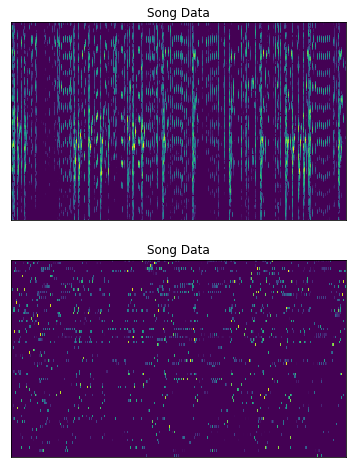

In [107]:
mat_data = scipy.io.loadmat('MackeviciusData.mat')
neural_data = mat_data['NEURAL']
song_data = mat_data['SONG']

fig, axes = plt.subplots(2, 1, figsize=(6, 8))
axes[0].imshow(song_data, aspect='auto')
axes[0].set_title('Song Data')
axes[0].get_xaxis().set_ticks([])
axes[0].get_yaxis().set_ticks([])

axes[1].imshow(neural_data, aspect='auto')
axes[1].set_title('Song Data')
axes[1].get_xaxis().set_ticks([])
axes[1].get_yaxis().set_ticks([])
plt.show()